This the same as cerate_features_RMS file, here we just visualize RMS signals.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Path to where to save the images.

In [ ]:
folder='/content/gdrive/Shared drives/Nikolina/RMS data/'
paths=[folder+'rms_session1.csv',folder+'rms_session2.csv',folder+'rms_session3.csv',folder+'rms_session4.csv',folder+'rms_session5.csv' ]
print(paths)

['/content/gdrive/Shared drives/Nikolina/RMS data/rms_session1.csv', '/content/gdrive/Shared drives/Nikolina/RMS data/rms_session2.csv', '/content/gdrive/Shared drives/Nikolina/RMS data/rms_session3.csv', '/content/gdrive/Shared drives/Nikolina/RMS data/rms_session4.csv', '/content/gdrive/Shared drives/Nikolina/RMS data/rms_session5.csv']


In [ ]:
import h5py
import pandas as pd
import numpy as np
from skimage import io
import scipy
import scipy.signal as signal 
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler

In [ ]:
def read_data(session_numb):
    day16name='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session1_10kHz.mat'
    day17name='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session2_10kHz.mat'
    day20name='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session3_10kHz.mat'
    day23name1='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session4_10kHz.mat'
    day23name2='/content/gdrive/Shared drives/Nikolina/Data with all targets (regression 30 kHz, regression 10Khz and classification 10 kHz)/session5_10kHz.mat'

    
    c1=len(session_numb)
    c2=session_numb[0]
       
    if (1 in session_numb):
        fulldata     = h5py.File(day16name)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]
        
        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==1:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)


    if (2 in session_numb):
        fulldata     = h5py.File(day17name)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]

        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==2:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)

        
    if (3 in session_numb):
        fulldata     = h5py.File(day20name)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]

        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==3:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)
            
    if (4 in session_numb):
        fulldata     = h5py.File(day23name1)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]

        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==4:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)
       
        
    if (5 in session_numb):
        fulldata     = h5py.File(day23name2)
        #trigger=fulldata["trigger"][:]
        sig=fulldata["sig"][:]
        #t=fulldata['time'][:]
        targets=fulldata['targets'][:]

        targets10=fulldata['targets10'][:]
        targets10c=fulldata['targets10c'][:]
        if c1==1 or c2==5:
            sig_out=sig
            targets_out=targets
            targets_out10=targets10
            targets_out10c=targets10c
        else:
            sig_out=np.concatenate((sig_out,sig),axis=0)
            targets_out=np.concatenate((targets_out,targets),axis=0)
            targets_out10=np.concatenate((targets_out10,targets10),axis=0)
            targets_out10c=np.concatenate((targets_out10c,targets10c),axis=0)
     
    return sig_out, targets_out, targets_out10, targets_out10c



def create_rms(data,targets,w):  
    fs=10000
    w=int(w*fs) #window length 
    o=0

    inputs=[]
    outputs=[]
    input0=rmValue(data[0:56,0:w])
    inputs.append(input0)
    output0=10*targets[0:5,w]
    outputs.append(output0)
    i=w-o
    last=np.shape(data)[1]-w-1
    while i<last:

        inputi=data[0:56,i:i+w]
        rms=rmValue(inputi)
        #inputi=Normalizer().fit_transform(inputi)
        inputs.append(rms)
        targeti=10*targets[0:5,i+w]
        outputs.append(targeti)
        i=i+w-o

    inputs.append(rmValue(data[0:56,last:last+w]))
    outputs.append(10*targets[0:5,last+w])
    inputs=np.array(inputs)
    outputs=np.array(outputs)
    print('input: ',np.shape(inputs))
    print('output: ',np.shape(outputs))
    return inputs, outputs

def rmValue(data): 
  n=np.shape(data)[0]
  RMS=np.zeros(n)
  for i in range(0,n): 
    RMS[i] = np.sqrt(np.mean(data[i,:]**2)) 

  return RMS 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  del sys.path[0]


data:  (5550000, 56)
targets:  (5550000, 5)
targets10:  (1850000, 5)
targets10c:  (1850000, 9)
transposed data:  (56, 5550000)
transposed targets:  (5, 5550000)
transposed targets10:  (5, 1850000)
transposed targets10c:  (9, 1850000)


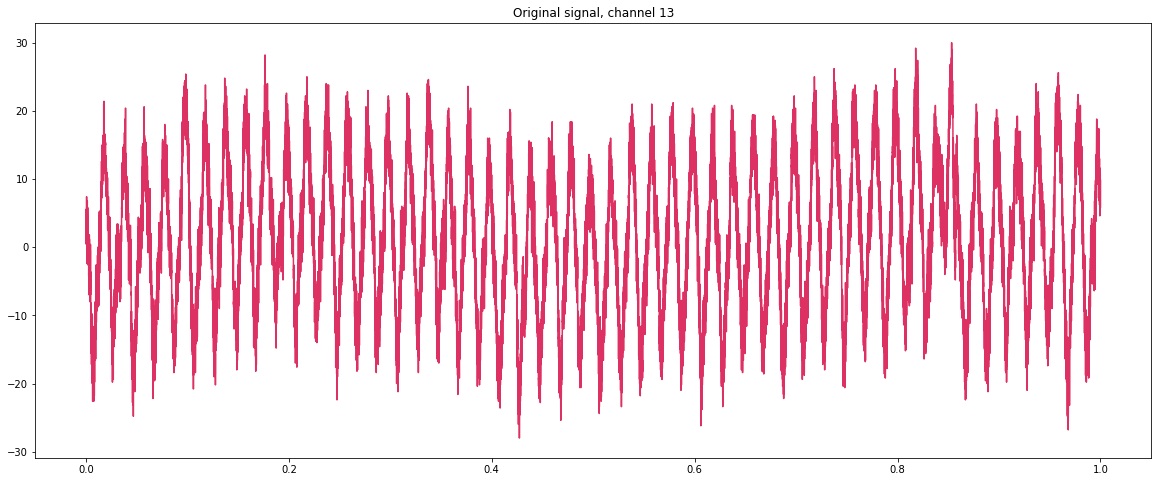

In [ ]:
session=1
(t_data, t_targets, downs_targets,downs_targetsc)=read_data([session])# training sessions
print('data: ', np.shape(t_data))
print('targets: ', np.shape(t_targets))
print('targets10: ', np.shape(downs_targets))
print('targets10c: ', np.shape(downs_targetsc))
t_data=np.transpose(t_data)
t_targets=np.transpose(t_targets)
downs_targets=np.transpose(downs_targets)
downs_targetsc=np.transpose(downs_targetsc)
print('transposed data: ', np.shape(t_data))
print('transposed targets: ', np.shape(t_targets))
print('transposed targets10: ', np.shape(downs_targets))
print('transposed targets10c: ', np.shape(downs_targetsc))

channel=13
plt.figure(figsize=(20,8))
plt.plot(np.linspace(0,1,len(t_data[channel,0:1*30000])),t_data[channel,0:1*30000],color='#DE3163')
plt.title('Original signal, channel '+str(channel))

plt.savefig('/content/gdrive/Shared drives/Nikolina/Results/Report figures/RMS_step0.png')

  2%|▏         | 1/56 [00:00<00:08,  6.52it/s]

 [INFO] Filtering ..


100%|██████████| 56/56 [00:08<00:00,  6.87it/s]


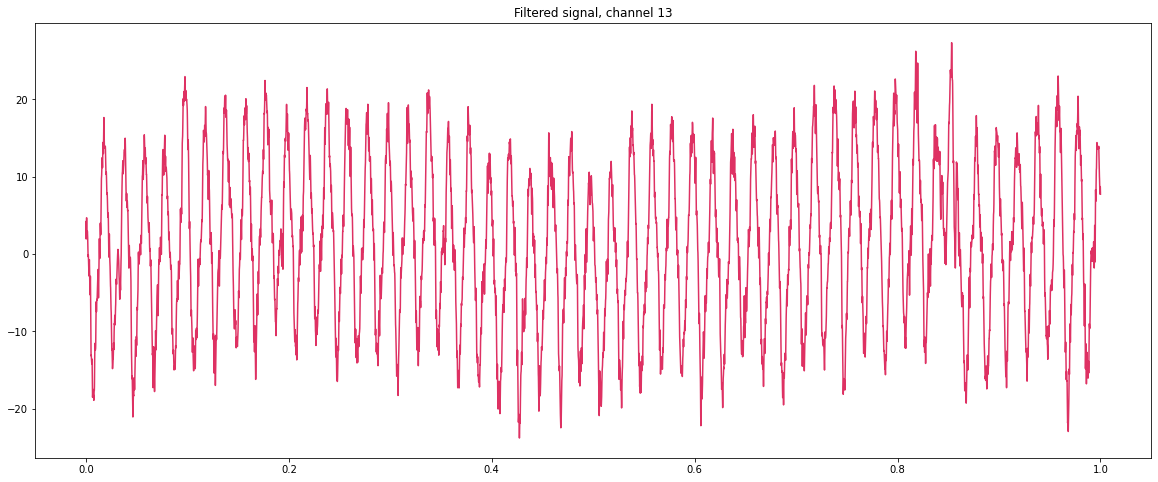

In [ ]:
fs=30000
high=3000/fs
low=300/fs
#b2, a2 = signal.butter(4, [low,high], btype='bandpass')
b2, a2 = signal.butter(4, high, btype='lowpass')
n=np.shape(t_data)[1]
filtered=np.zeros((56,n))

print(' [INFO] Filtering ..')
for channel in tqdm(np.arange(0,56,1)): 
  filtered[channel,:] = signal.filtfilt(b2, a2,t_data[channel,:]).reshape(1,n)

t_data=filtered
channel=13
plt.figure(figsize=(20,8))
plt.plot(np.linspace(0,1,len(t_data[channel,0:1*30000])),t_data[channel,0:1*30000],color='#DE3163')
plt.title('Filtered signal, channel '+str(channel))

plt.savefig('/content/gdrive/Shared drives/Nikolina/Results/Report figures/RMS_step1.png')

original= (56, 5550000)
downsampled= (56, 1850000)
targets:  (5, 1850000)


Text(0.5, 1.0, 'Filtered signal, channel 13')

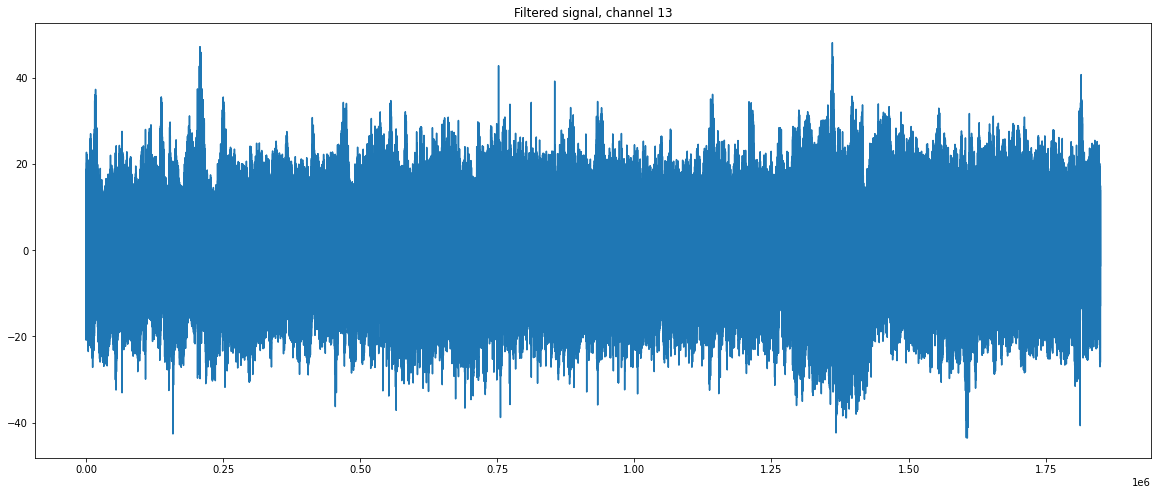

In [ ]:
downs_data=np.zeros((56,int(np.shape(t_data)[1]/3)))
for channel in range(0,56):
  downs_data[channel,:]=scipy.signal.decimate(t_data[channel,:], 3)

print('original=',np.shape(t_data))
print('downsampled=',np.shape(downs_data))
print('targets: ', np.shape(downs_targets))

channel=13
plt.figure(figsize=(20,8))
plt.plot(downs_data[channel,:])
plt.title('Filtered signal, channel '+str(channel))

  5%|▌         | 3/56 [00:00<00:01, 27.19it/s]

Filtering ...


100%|██████████| 56/56 [00:02<00:00, 27.54it/s]


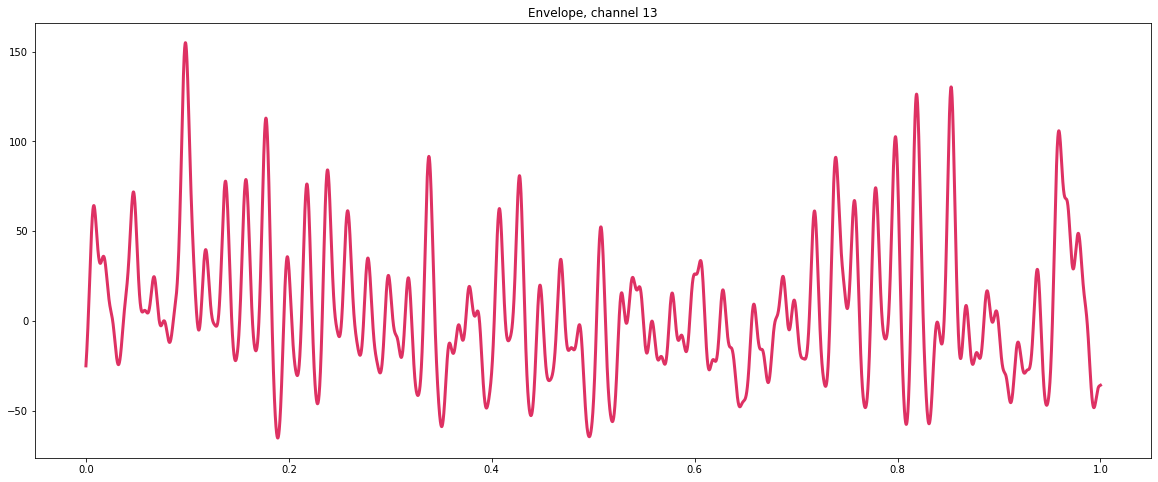

In [ ]:
fs=10000
high=100/fs
low=2/fs
#b2, a2 = signal.butter(2, high, btype='lowpass',analog=False)
b2, a2 = signal.butter(2, [low,high] , btype='bandpass')
n=np.shape(downs_data)[1]
envelope=np.zeros((56,n))

#filt = signal.butter(2, 100, 'lowpass', fs=10000, output='sos', analog=False)
#filtered=signal.sosfilt(filt, downs_data[0,:]**2).reshape(1,n)
print('Filtering ...')

for channel in tqdm(np.arange(0,56,1)): 
  envelope[channel,:] = signal.filtfilt(b2, a2,downs_data[channel,:]**2).reshape(1,n)
  #filtered = np.vstack((filtered,signal.sosfilt(filt, downs_data[channel,:]**2).reshape(1,n)))
channel=13
plt.figure(figsize=(20,8))
plt.plot(np.linspace(0,1,len(envelope[channel,0:1*10000])),envelope[channel,0:1*10000],linewidth=3,color='#DE3163')
plt.title('Envelope, channel '+str(channel))


plt.savefig('/content/gdrive/Shared drives/Nikolina/Results/Report figures/RMS_step2.png')

input:  (7400, 56)
output:  (7400, 5)


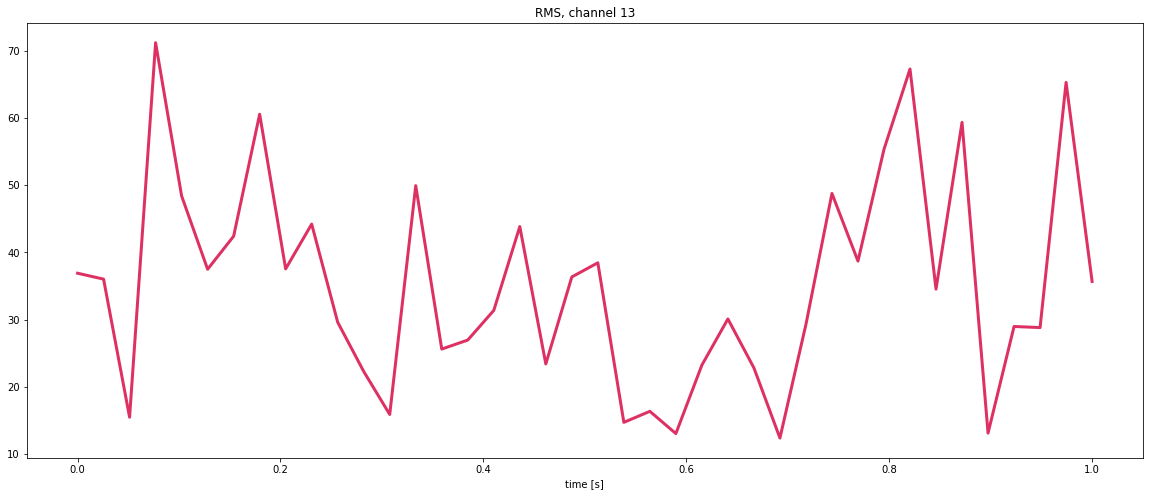

In [ ]:
# 1000/250 = 40 Hz new sampling frequency
w=0.025
[inputs, outputs]=create_rms(envelope,downs_targets,w)

channel=13
plt.figure(figsize=(20,8))
plt.plot(np.linspace(0,1,len(inputs[0:1*40,channel])),inputs[0:1*40,channel],linewidth=3,color='#DE3163')
plt.title('RMS, channel '+str(channel))
plt.xlabel('time [s]')

plt.savefig('/content/gdrive/Shared drives/Nikolina/Results/Report figures/RMS_step3.png')

In [ ]:
if session==1:
  m1_b=np.arange(0,50,5)
  m1_s=np.arange(1,51,5)
  m2_b=np.arange(50,100,5)
  m2_s=np.arange(51,101,5)
  m3_b=np.arange(100,150,5)
  m3_s=np.arange(101,151,5)
  m4_b=np.arange(150,185,5)
  m4_s=np.arange(151,186,5)
elif session==2:
  m1_b=np.arange(0,50,5)
  m1_s=np.arange(1,51,5)
  m2_b=np.arange(50,90,5)
  m2_s=np.arange(51,91,5)
  m3_b=np.arange(90,140,5)
  m3_s=np.arange(91,141,5)
  m4_b=np.arange(140,190,5)
  m4_s=np.arange(141,191,5)
else:
  m1_b=np.arange(0,50,5)
  m1_s=np.arange(1,51,5)
  m2_b=np.arange(50,100,5)
  m2_s=np.arange(51,101,5)
  m3_b=np.arange(100,150,5)
  m3_s=np.arange(101,151,5)
  m4_b=np.arange(150,200,5)
  m4_s=np.arange(151,201,5)

print(m1_b, m1_s)
print(m2_b, m2_s)
print(m3_b, m3_s)
print(m4_b, m4_s)


[ 0  5 10 15 20 25 30 35 40 45] [ 1  6 11 16 21 26 31 36 41 46]
[50 55 60 65 70 75 80 85 90 95] [51 56 61 66 71 76 81 86 91 96]
[100 105 110 115 120 125 130 135 140 145] [101 106 111 116 121 126 131 136 141 146]
[150 155 160 165 170 175 180] [151 156 161 166 171 176 181]


In [ ]:
c1=np.zeros((56,40))
s1=np.zeros((56,40))
for channel in range(56):
  tmp=[]
  for ind in range(len(m1_b)):
    tmp.append(inputs[int(m1_b[ind]*40):int(m1_s[ind]*40),channel])
  tmp=np.array(tmp)
  m1=max(tmp.flatten())
  normalized=tmp/m1
  d=np.mean(normalized,axis=0)
  c1[channel,:]=d
  s1[channel,:]=np.std(normalized,axis=0)

c2=np.zeros((56,40))
s2=np.zeros((56,40))
for channel in range(56):
  tmp=[]
  for ind in range(len(m2_b)):
    tmp.append(inputs[int(m2_b[ind]*40):int(m2_s[ind]*40),channel])
  tmp=np.array(tmp)
  m1=max(tmp.flatten())
  #m2=min(tmp.flatten())
  normalized=tmp/m1
  d=np.mean(normalized,axis=0)
  c2[channel,:]=d
  s2[channel,:]=np.std(normalized,axis=0)

c3=np.zeros((56,40))
s3=np.zeros((56,40))
for channel in range(56):
  tmp=[]
  for ind in range(len(m3_b)):
    tmp.append(inputs[int(m3_b[ind]*40):int(m3_s[ind]*40),channel])
  tmp=np.array(tmp)
  m1=max(tmp.flatten())
  normalized=tmp/m1
  d=np.mean(normalized,axis=0)
  c3[channel,:]=d
  s3[channel,:]=np.std(normalized,axis=0)

c4=np.zeros((56,40))
s4=np.zeros((56,40))
for channel in range(56):
  tmp=[]
  for ind in range(len(m4_b)):
    tmp.append(inputs[int(m4_b[ind]*40):int(m4_s[ind]*40),channel])
  tmp=np.array(tmp)
  m1=max(tmp.flatten())
  m2=min(tmp.flatten())
  normalized=tmp/m1
  d=np.mean(normalized,axis=0)
  c4[channel,:]=d
  s4[channel,:]=np.std(normalized,axis=0)

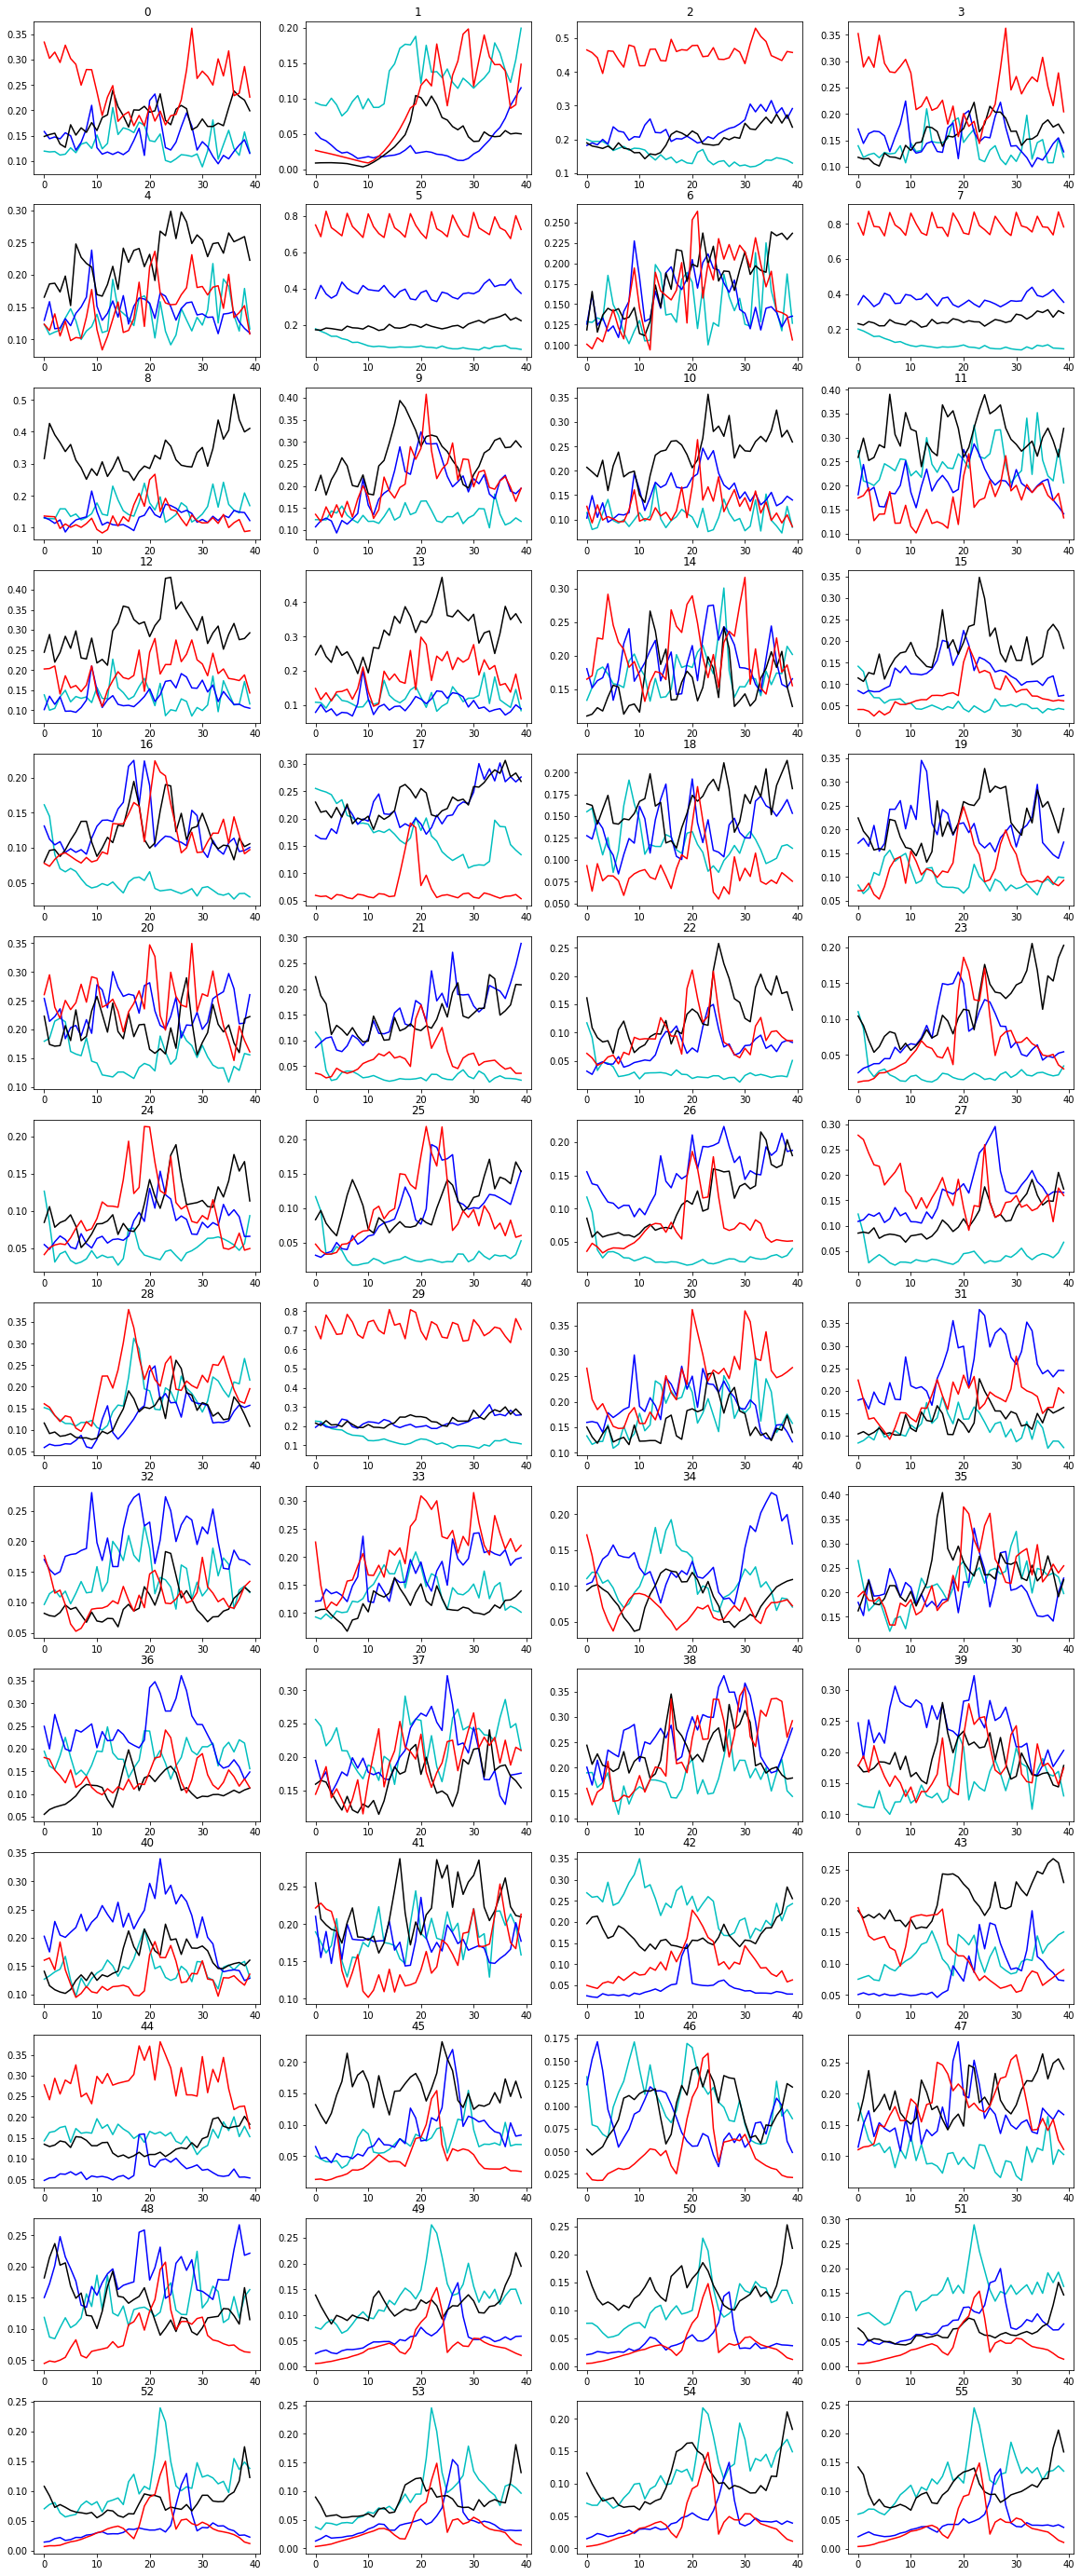

In [ ]:
fig,axs=plt.subplots(nrows=14,ncols=4,figsize=(20,50))
i=0
k=0
for channel in range(56):
  axs[i,k].plot(c1[channel,:],color='c')
  axs[i,k].plot(c2[channel,:],color='b')
  axs[i,k].plot(c3[channel,:],color='k')
  axs[i,k].plot(c4[channel,:],color='r')

  axs[i,k].set_title(str(channel))
  k+=1
  if k==4:
    k=0
    i+=1

fig.savefig('RMS1sec.png')

In [ ]:
fig.savefig('RMS5sec.png')

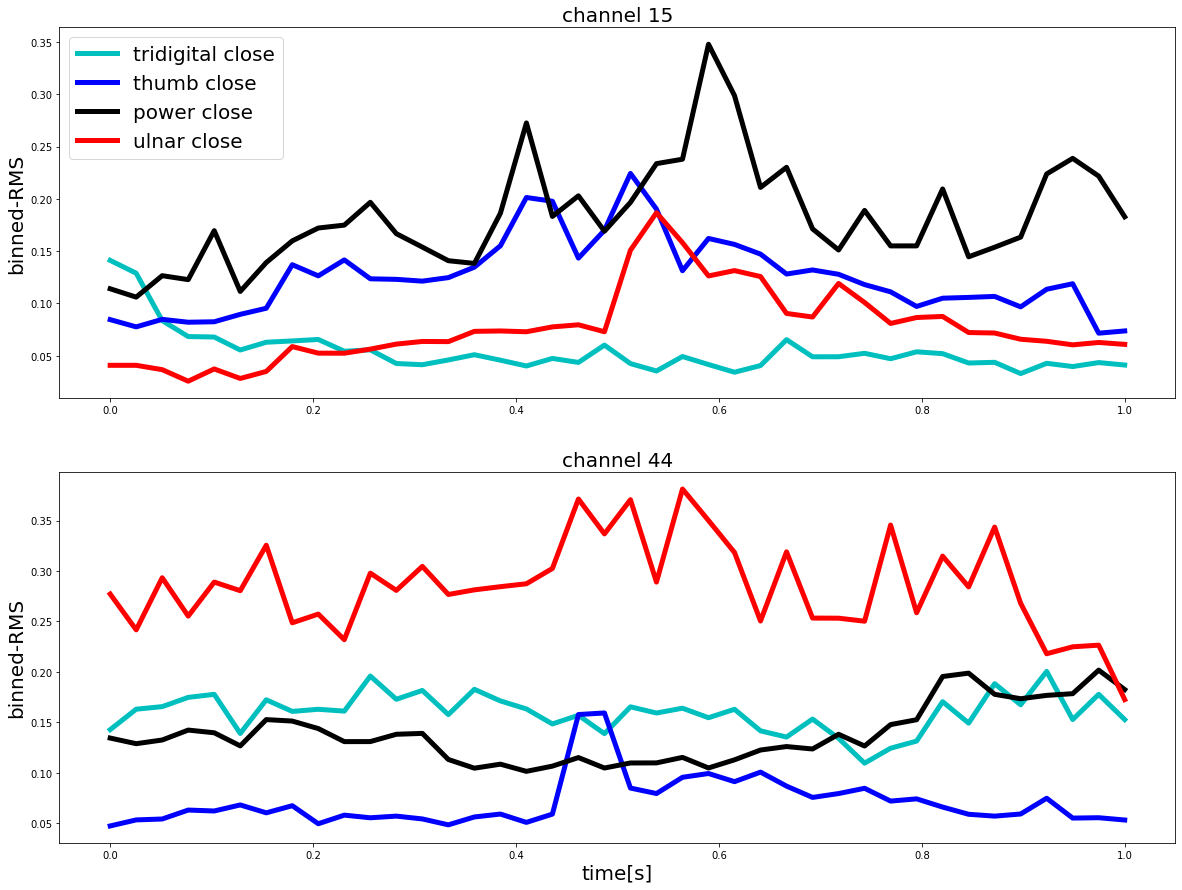

In [ ]:
fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(20,15))
i=0
k=0
t=np.linspace(0,1,40)
for channel in [15,44]:

  axs[k].plot(t,c1[channel,:],color='c',linewidth=5)
  axs[k].plot(t,c2[channel,:],color='b',linewidth=5)
  axs[k].plot(t,c3[channel,:],color='k',linewidth=5)
  axs[k].plot(t,c4[channel,:],color='r',linewidth=5)
  axs[k].set_ylabel('binned-RMS',fontsize=20)
  axs[1].set_xlabel('time[s]',fontsize=20)
  axs[k].set_title('channel '+ str(channel),fontsize=20)
  axs[0].legend(('tridigital close','thumb close', 'power close', 'ulnar close'),loc='upper left',prop={'size': 20})
  k+=1
  if k==4:
    k=0
    i+=1
plt.savefig('/content/gdrive/Shared drives/Nikolina/Results/Report figures/RMS_example.png')